In [1]:
import numpy as np
import importlib
import simulate_data
from simulation_evaluation import run_test, plot_mse, get_conf_intervals, plot_gain_curves
from scipy.stats import beta

importlib.reload(simulate_data)

<module 'simulate_data' from 'D:\\Delft\\Year 3\\Q4\\code\\research-project\\simulate_data.py'>

# Case 1
(Simulation 1 in the paper)

Balanced, with simple cate

In [2]:
e = lambda x: 0.5
d = 10
weights = np.random.uniform(-5, 5, d)
mu_0 = lambda x: np.dot(x, weights)
mu_1 = lambda x: mu_0(x) + 20
n_train = 40000
n_test = 10000
reps = 50

In [3]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

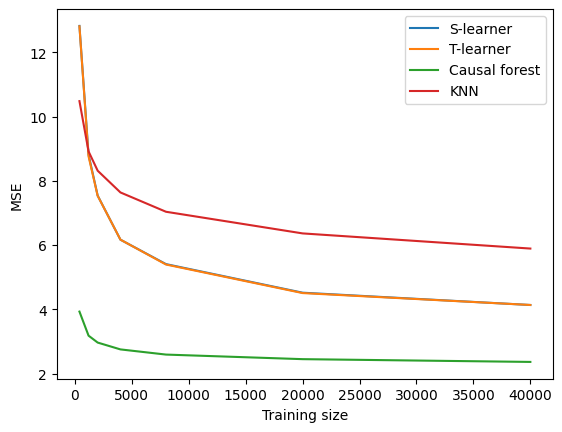

In [4]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [5]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,4.133347,0.167180
T-Learner,4.133783,0.174837
Causal Forest,2.360990,0.031739
KNN,5.890371,0.087636


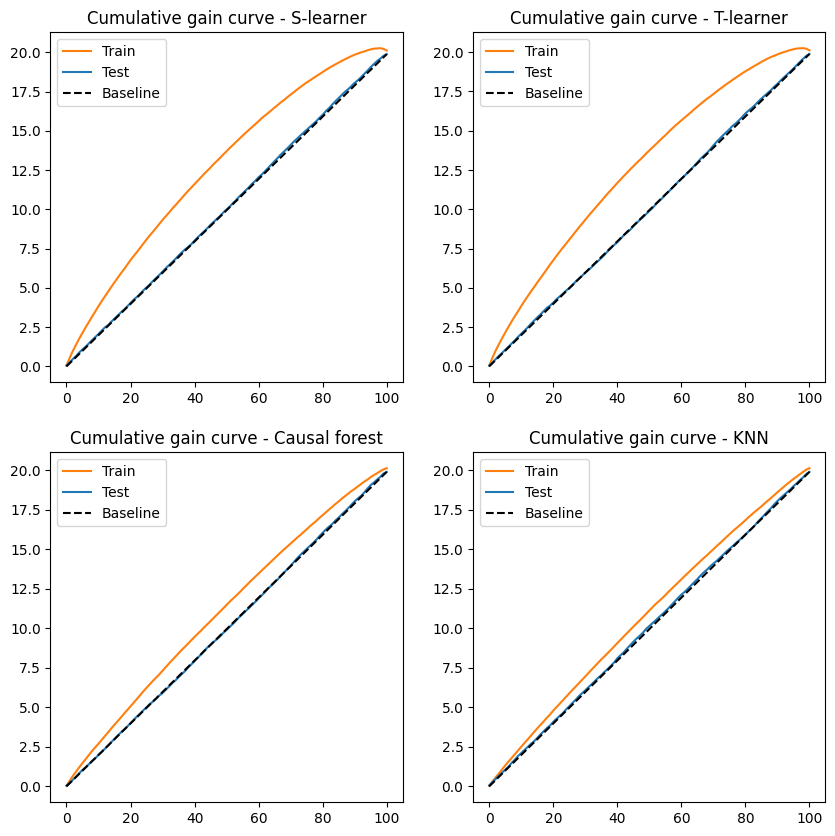

In [6]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 2
(Simulation 2 in the paper)

Unbalanced, simple cate

In [7]:
e = lambda x: 0.01
d = 10
weights = np.random.uniform(-5, 5, d)
mu_0 = lambda x: np.dot(x, weights) + 5 * (1 if x[0] > 0.5 else 0)
mu_1 = lambda x: mu_0(x) + 8 * (1 if x[1] > 0.1 else 0)
n_train = 40000
n_test = 10000
reps = 50

In [8]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

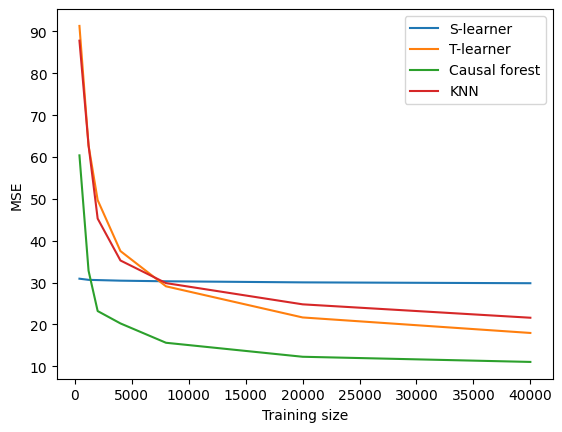

In [9]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [10]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,29.853609,0.451476
T-Learner,17.974252,1.383955
Causal Forest,11.055824,1.007517
KNN,21.610669,1.318162


invalid value encountered in scalar divide


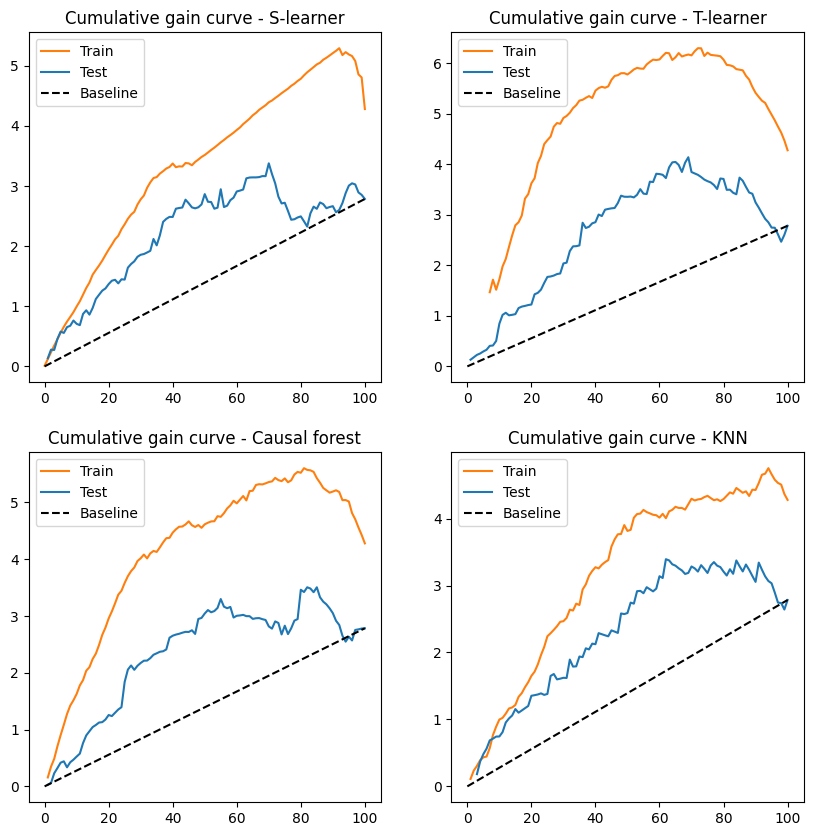

In [11]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 3
(Simulation 3 in the paper)

Balanced, complex linear cate, no confounding

In [12]:
e = lambda x: 0.5
d = 10
weights_1 = np.random.uniform(1, 30, d)
weights_2 = np.random.uniform(1, 30, d)
mu_0 = lambda x: np.dot(x, weights_1)
mu_1 = lambda x: np.dot(x, weights_2)
n_train = 40000
n_test = 10000
reps = 50

In [13]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

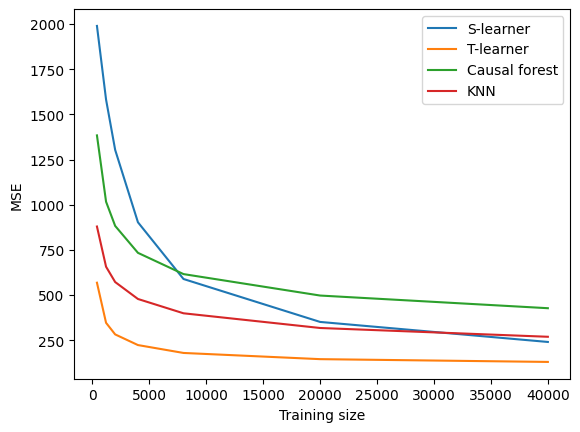

In [14]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [15]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,240.844663,14.546531
T-Learner,130.409251,4.275705
Causal Forest,427.532777,10.557900
KNN,269.533476,5.487804


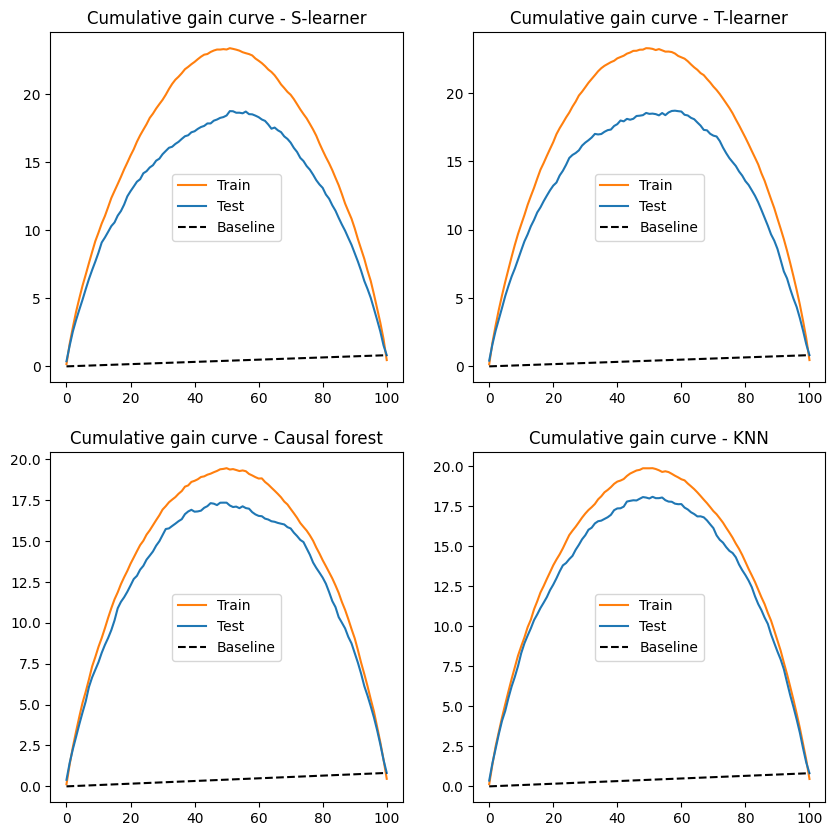

In [16]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 4

Balanced, complex non-liner cate (smoother version), no confounding

In [17]:
e = lambda x: 0.5
d = 10
fun = lambda x : 1.0 + (1.0 / (1 + np.exp(-20 * (x - 1.0/3.0))))
mu_0 = lambda x: 0.5 * fun(x[0]) * fun(x[1])
mu_1 = lambda x: -0.5 * fun(x[0]) * fun(x[1])
n_train = 40000
n_test = 10000
reps = 50

In [18]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

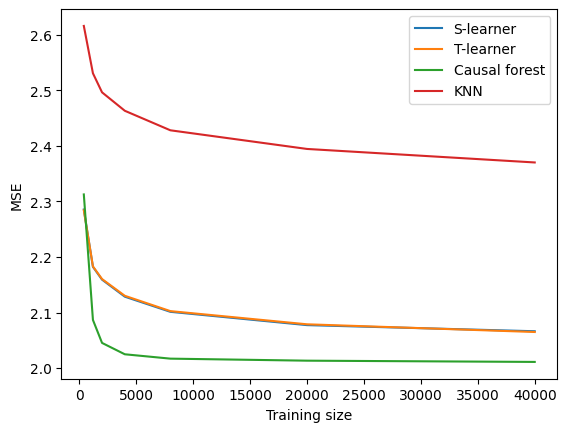

In [19]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [20]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,2.066251,0.029228
T-Learner,2.064894,0.030774
Causal Forest,2.010996,0.029878
KNN,2.370263,0.033569


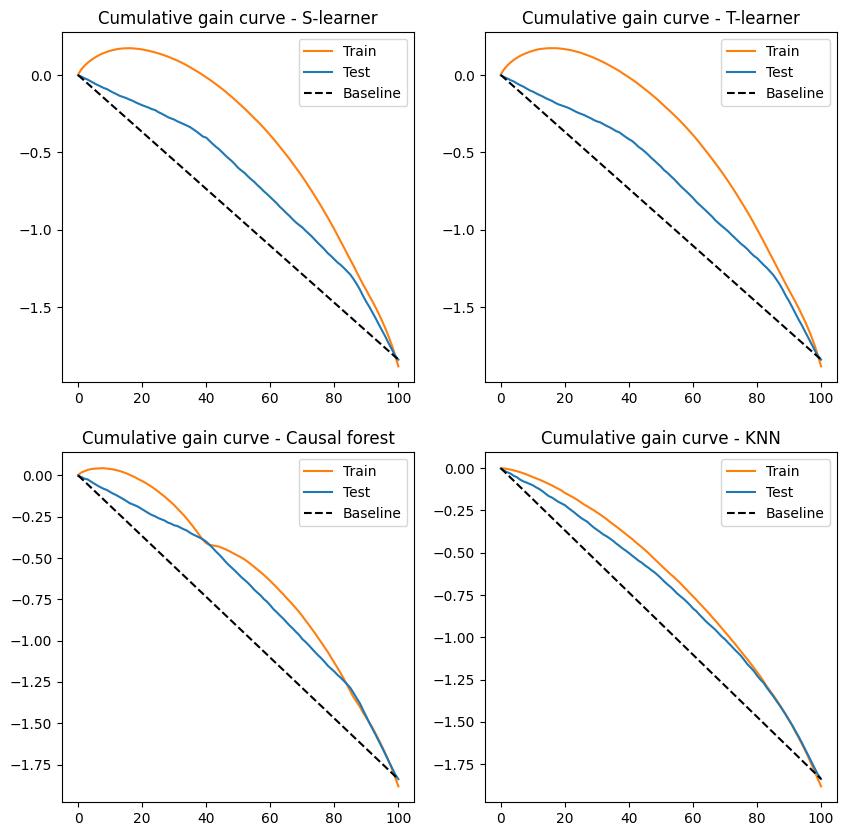

In [21]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 5
(Simulation 4 in the paper)

Balanced, complex non-liner cate (sharper spike), no confounding

In [22]:
e = lambda x: 0.5
d = 10
fun = lambda x : 2.0 / (1 + np.exp(-12 * (x - 0.5)))
mu_0 = lambda x: 0.5 * fun(x[0]) * fun(x[1])
mu_1 = lambda x: -0.5 * fun(x[0]) * fun(x[1])
n_train = 40000
n_test = 10000
reps = 50

In [23]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

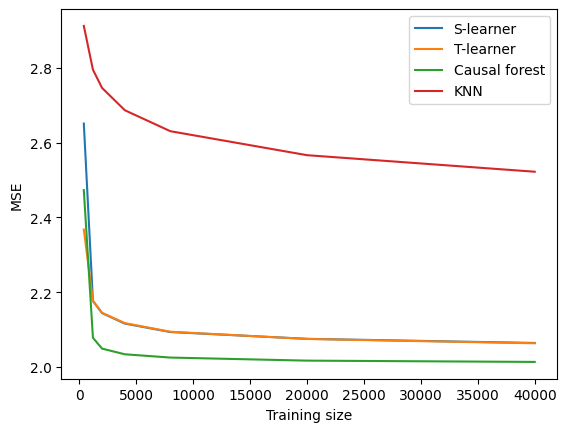

In [24]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [25]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,2.064444,0.030553
T-Learner,2.063632,0.029356
Causal Forest,2.013781,0.028921
KNN,2.522279,0.040160


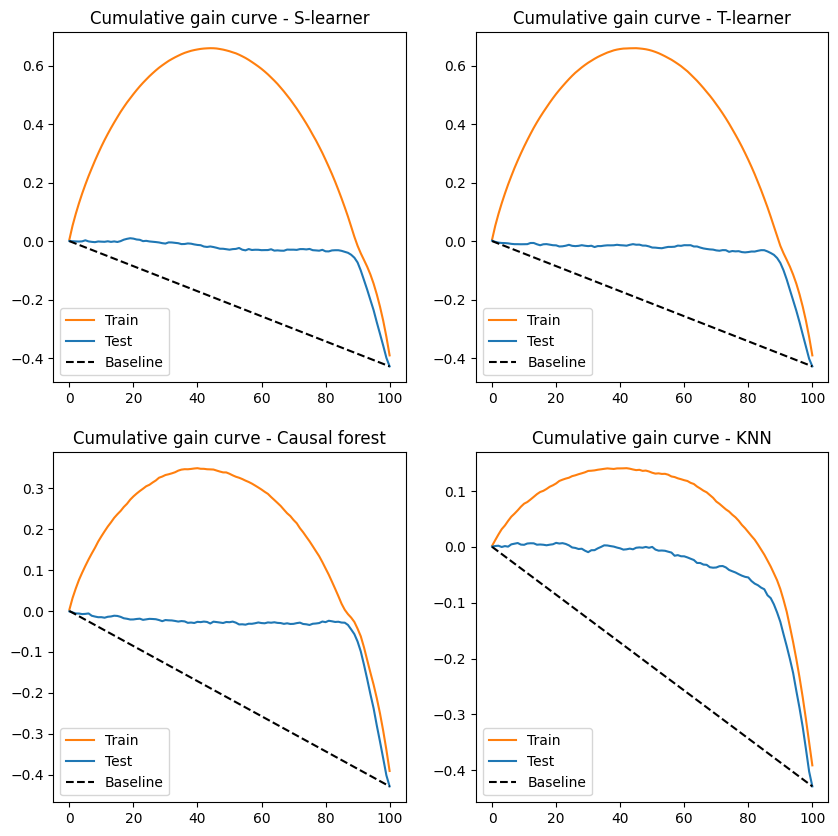

In [26]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 6
(Simulation 5 in the paper)

Balanced, no treatment effect

In [27]:
e = lambda x: 0.5
d = 10
weights = np.random.uniform(1, 30, d)
mu_0 = lambda x: np.dot(x, weights)
mu_1 = lambda x: mu_0(x)
n_train = 40000
n_test = 10000
reps = 50

In [28]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

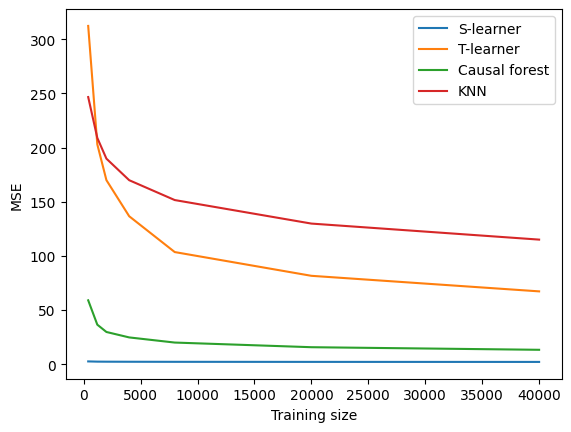

In [29]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [30]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,2.203593,0.031601
T-Learner,67.296112,4.208392
Causal Forest,13.389959,0.572256
KNN,115.049400,1.676144


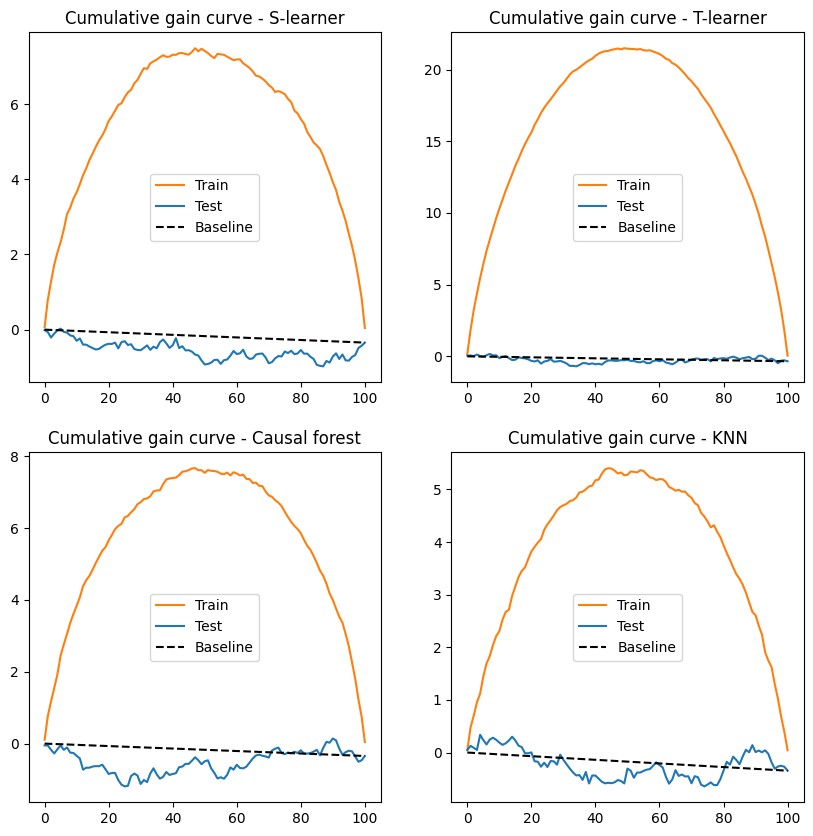

In [31]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 7

Balanced, no treatment effect, piecewise function

In [32]:
e = lambda x: 0.5
d = 16
weights_1 = np.concatenate((np.random.uniform(-15, 15, 4), [0 for _ in range(12)]))
weights_2 = np.concatenate(([0,0,0,0], np.random.uniform(-15, 15, 4), [0 for _ in range(8)]))
weights_3 = np.concatenate(([0 for _ in range(8)], np.random.uniform(-15, 15, 4), [0,0,0,0]))
def mu_0(x):
    if x[15] < -0.4:
        return np.dot(x, weights_1)
    elif x[15] < 0.4:
        return np.dot(x, weights_2)
    else:
        return np.dot(x, weights_3)
mu_1 = lambda x: mu_0(x)
n_train = 40000
n_test = 10000
reps = 50

In [33]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

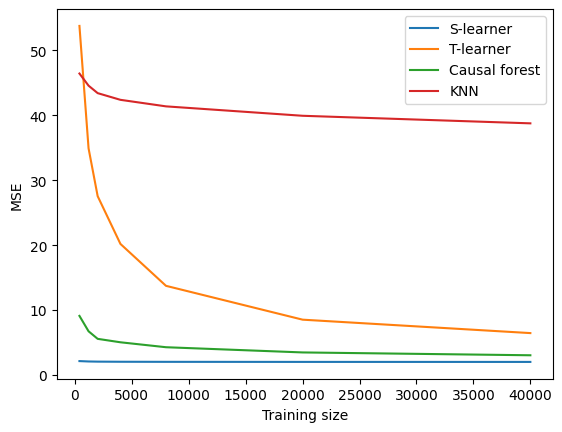

In [34]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [35]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,2.005306,0.030669
T-Learner,6.446601,0.346984
Causal Forest,3.030089,0.061635
KNN,38.761733,0.628293


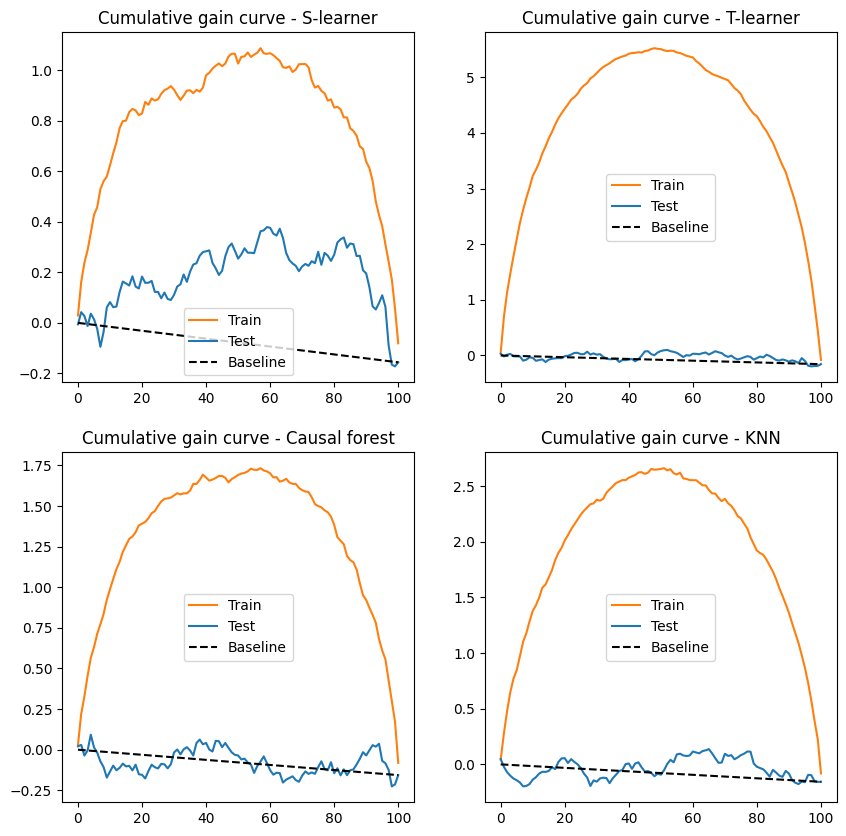

In [36]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)

# Case 8
(Simulation 6 in the paper)

Confounding

In [37]:
e = lambda x: 0.25 * (1 + beta(2, 4).pdf(x[0]))
d = 10
mu_0 = lambda x: 2 * x[0] - 1
mu_1 = lambda x: mu_0(x)
n_train = 40000
n_test = 10000
reps = 50

In [38]:
training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list = run_test(d, mu_0, mu_1, e, n_train, n_test, reps)

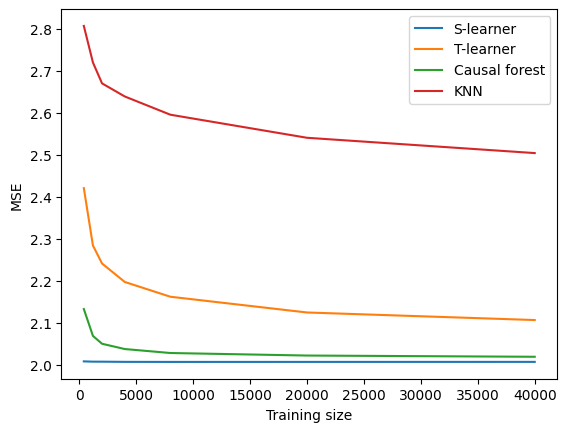

In [39]:
plot_mse(training_sizes, mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

In [40]:
get_conf_intervals(mse_s_list, mse_t_list, mse_forest_list, mse_knn_list)

,Mean,Std dev
S-Learner,2.007614,0.028854
T-Learner,2.107134,0.029353
Causal Forest,2.019777,0.028900
KNN,2.504231,0.035306


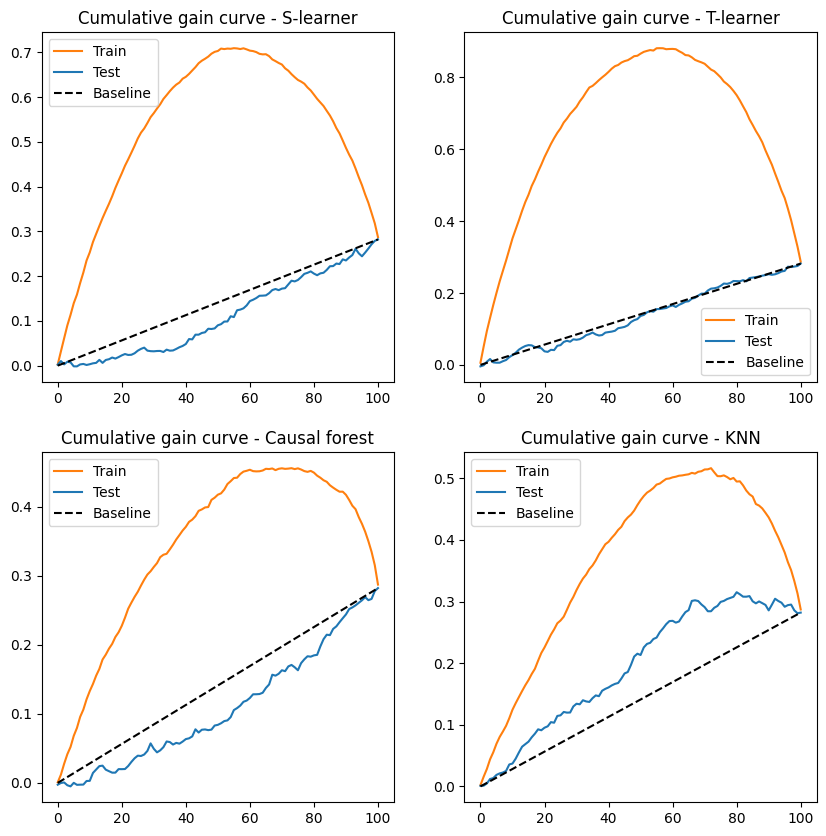

In [41]:
plot_gain_curves(d, mu_0, mu_1, e, n_train, n_test)